In [1]:
# Import all the necessary packages:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import scipy.optimize as so
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder     # turns it into binary representation
%matplotlib inline

# import csv
df = pd.read_csv('Assignment_1_data.csv')

# Supervised Learning, Regression

**Objectives**
- Linear OLS and robust regression.
- Using sklearn to do linear regression.

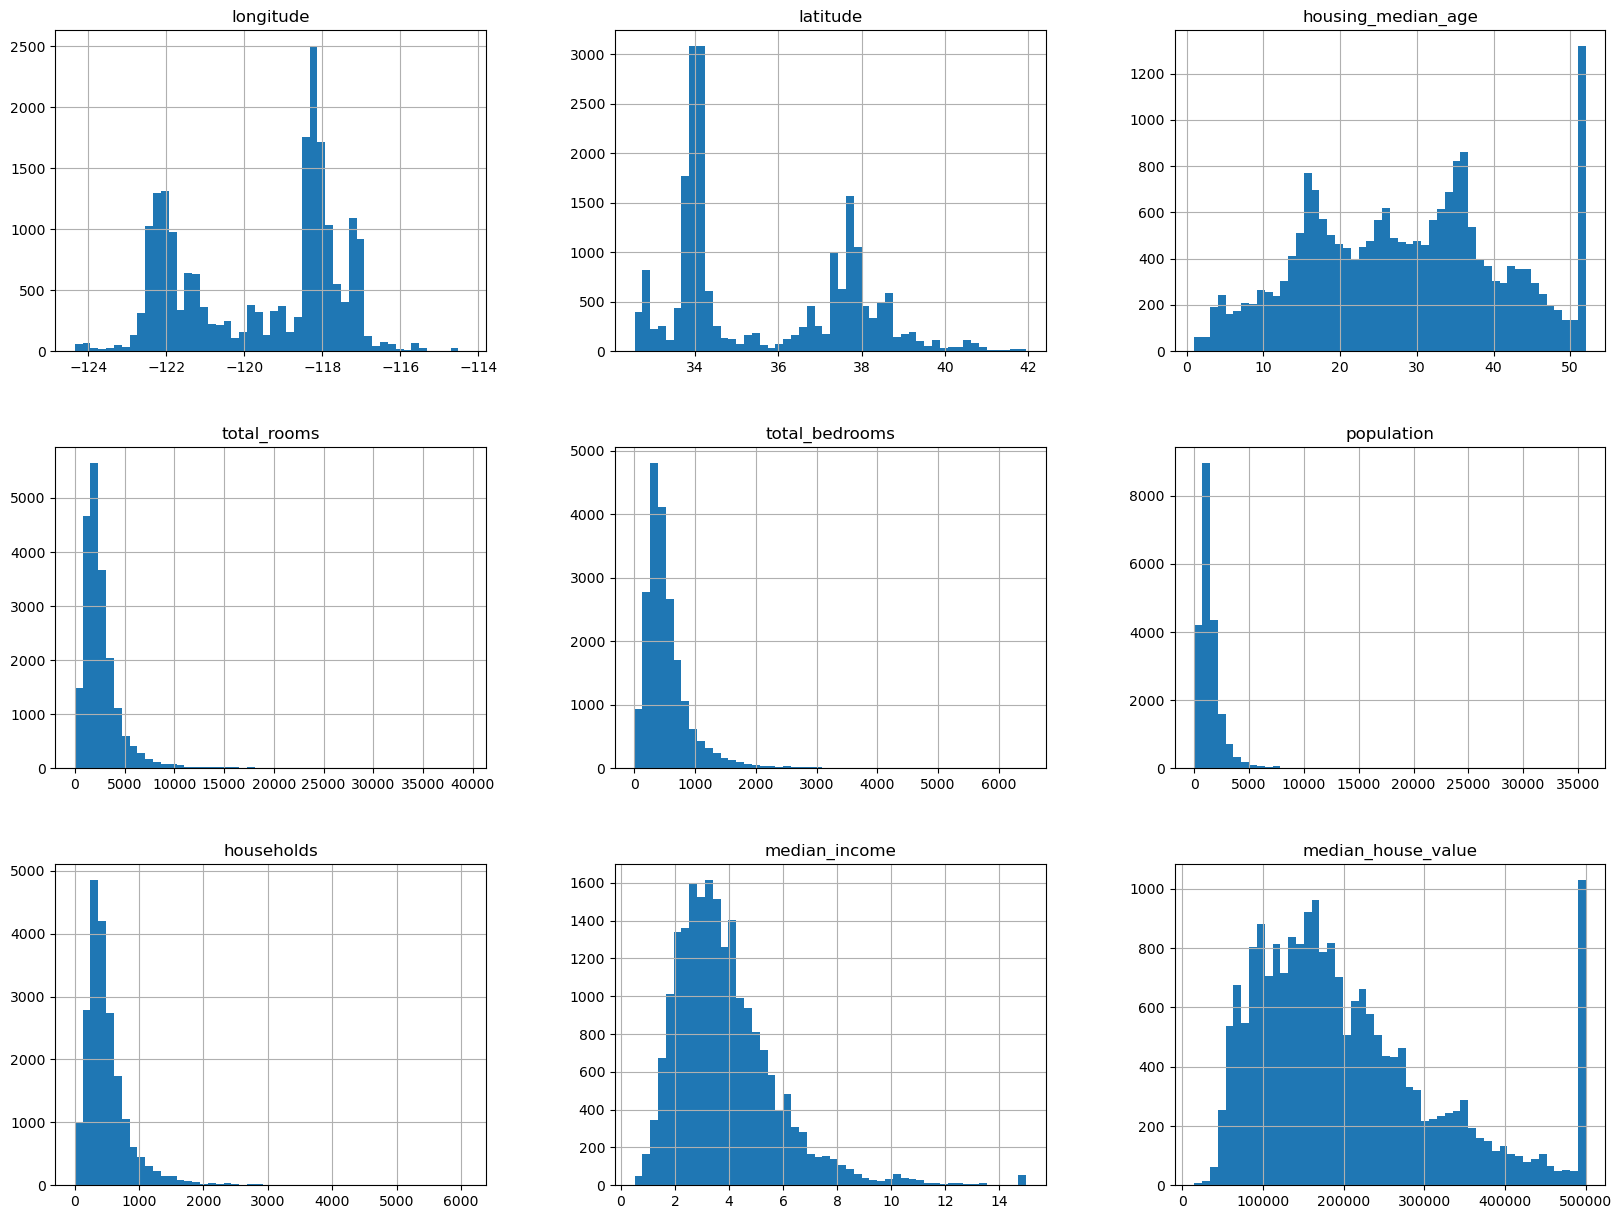

In [ ]:
# data manipulation and set up work

# check for features affecting your target attribute
housing = pd.read_csv('Lab_W2_Data.csv')
housing.describe()
housing.hist(bins = 50, figsize=(20,15))
plt.show()

# split data into test and training sets
seed = 2835
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=seed)

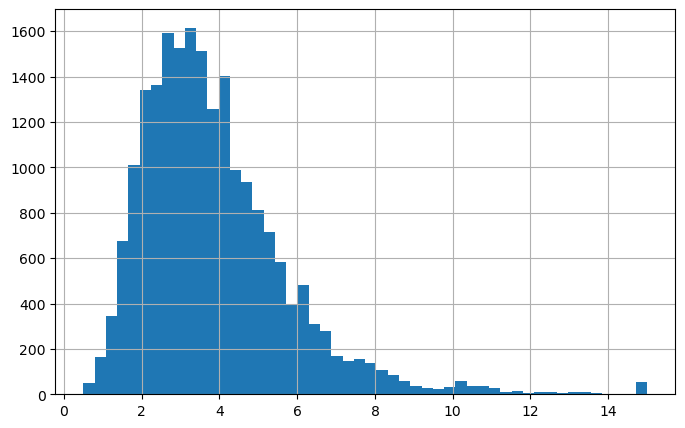

In [32]:
# split a continuous variable (median income) into categories
housing.median_income.hist(bins=50, figsize=(8, 5))
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
plt.show()                       

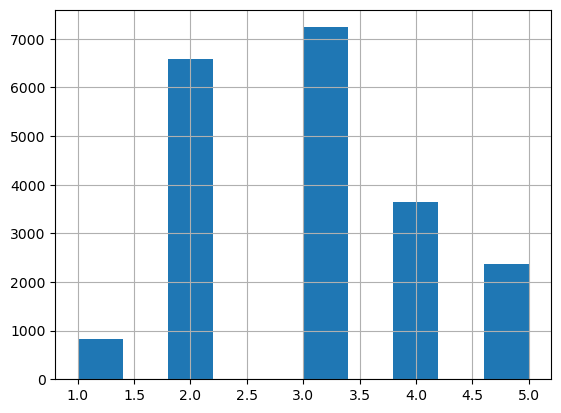

In [33]:
housing["income_cat"].hist()
plt.show()

In [41]:
# perform stratified sampling on data based on these categories
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=seed)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=seed)

compare_props = pd.DataFrame({
    "Full": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Full"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Full"] - 100

display(compare_props)

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

housing = strat_train_set.copy()

,Full,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.043362,8.880779,0.364964
2,0.318847,0.318798,0.324855,1.884212,-0.015195
3,0.350581,0.350533,0.351017,0.124378,-0.013820
4,0.176308,0.176357,0.169331,-3.957131,0.027480
5,0.114438,0.114341,0.111434,-2.624894,-0.084674


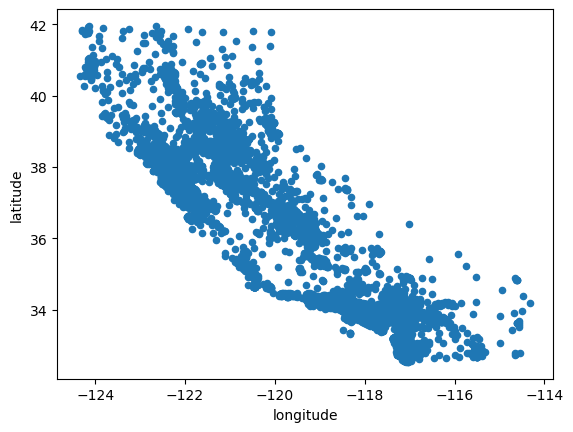

In [43]:
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

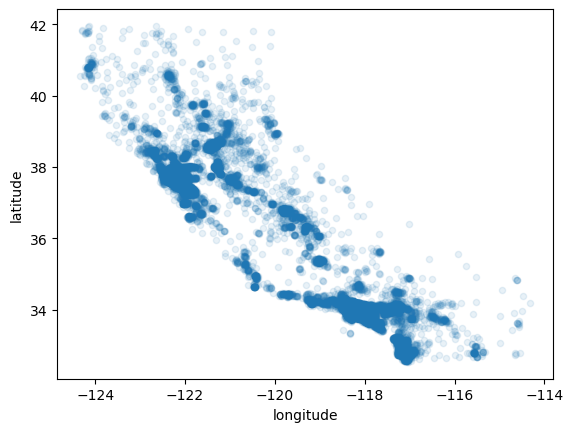

In [42]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

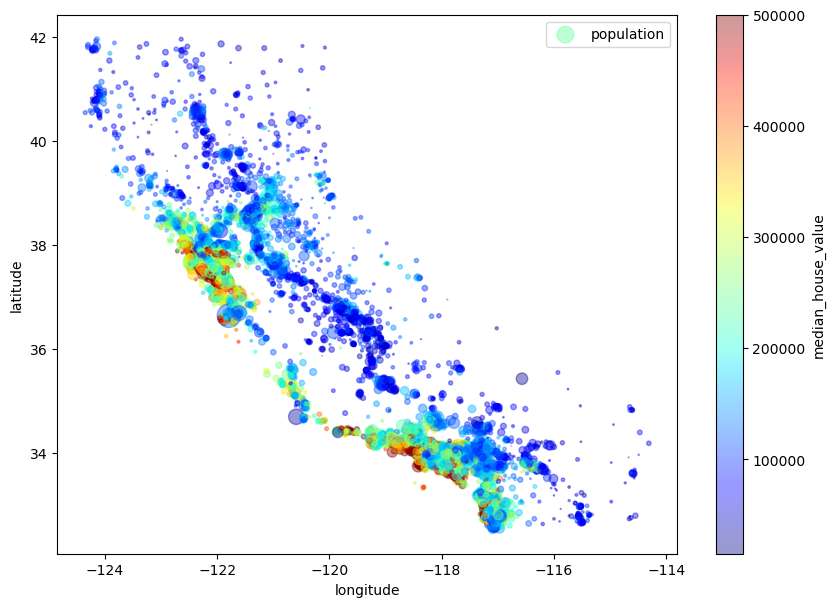

In [44]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

plt.legend()
plt.show()

In [49]:
# use an imputer to handle missing values for some attributes
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
# housing_tr

In [54]:
# use an encoder to handle categorical attributes
ordinal_encoder = OrdinalEncoder()
housing_cat = housing[["ocean_proximity"]]      # housing_cat as in categorical variables in housing
housing_cat.head(n=10)
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
# housing_cat_encoded
# ordinal_encoder.categories_

# turn into binary
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [35]:
# add new column that is time_study_avg = time_study/number_courses
df['time_study_avg'] = df['time_study']/df['number_courses']

# drop time_study column
df.drop('time_study', axis=1, inplace=True)

,number_courses,Marks,time_study_avg
number_courses,1.000000,0.417335,0.204844
Marks,0.417335,1.000000,0.942254
time_study_avg,0.204844,0.942254,1.000000


the PCC between study time per course and marks is 0.942253890364054


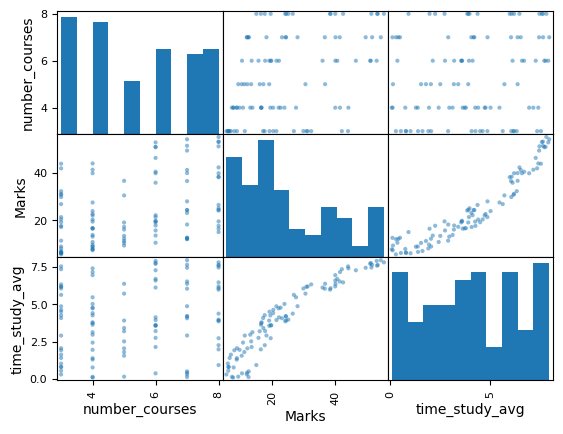

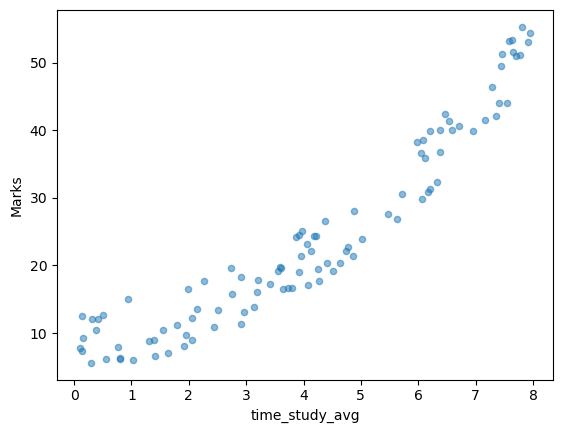

In [45]:
from pandas.plotting import scatter_matrix

# compute PCC
corr_matrix = df.corr()
display(corr_matrix)
print("the PCC between study time per course and marks is {}".format(corr_matrix['Marks']['time_study_avg']))
attributes = ["number_courses", "Marks", "time_study_avg"]
scatter_matrix(df[attributes])

# scatterplot of time_study_avg by Marks
df.plot(kind="scatter", x = "time_study_avg", y = "Marks", alpha = 0.5)
plt.show()

1

array([ 0.1, -0.2,  0.7])

0.887842393906195

array([1.22385811, 5.68875042])

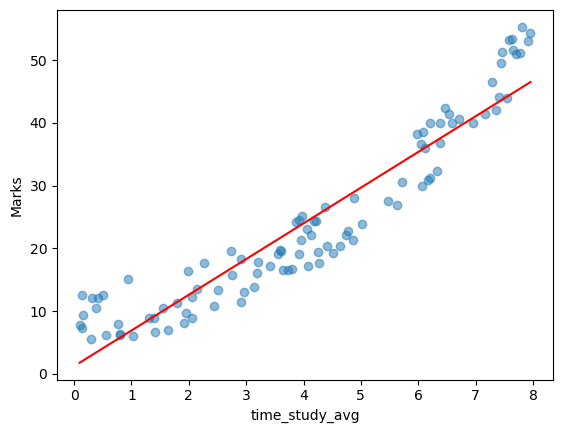

R-squared value for the fit of the line is 0.887842393906195


0.8872829641216162

array([1.03016223, 5.65579768])

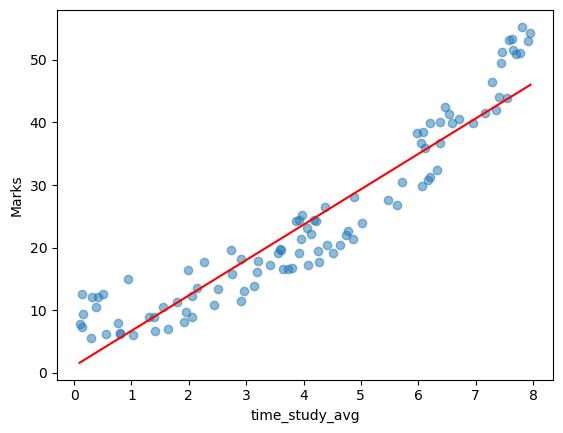

R-squared value for the fit of the line is 0.8872829641216162


In [37]:
# hard coding linear regression
def linearModelPredict(b,X):
    yp = X@b
    return yp
    
# Test
yhat = linearModelPredict(b = np.array([0.1, 0.3]), X = np.array([[1, 0], [1, -1], [1, 2]]))
display(np.ndim(yhat))
display(yhat)

def linearModelLossRSS(beta, X, y):
    predY = linearModelPredict(beta, X)
    res = y - predY
    rss = res.T @ res
    gradient = -2 * X.T @ res 
    return (rss, gradient)

b = np.array([0.1,0.3])
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0, 0.4, 2])

linearModelLossRSS(b, X, y)

import scipy.optimize as so

def linearModelFit(X, y, lossfcn = linearModelLossRSS):
    bstart = [0, 0]
    RESULT = so.minimize(lossfcn, bstart, args = (X, y), jac=True)
    # print(RESULT)
    b=RESULT.x
    res = y - np.mean(y)
    TSS = res @ res
    RSS, grad = linearModelLossRSS(b,X,y)
    # print(RSS)
    R2 = 1 - RSS/TSS
    return (R2, b)

X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0, 0.4, 2])

R2, b = linearModelFit(X, y)
R2, b

X = df.time_study_avg
y = df.Marks

Xn = np.c_[np.ones(X.size), X]    # adds col of ones
R2, b = linearModelFit(Xn, y)
display(R2, b)

# Plotting data
plt.scatter(X,y, alpha = 0.5)
# Plotting regression line
x_grid = np.linspace(min(X), max(X))
yp = linearModelPredict(b, np.c_[np.ones(x_grid.size), x_grid])
plt.plot(x_grid, yp, 'r')
plt.xlabel('time_study_avg')
plt.ylabel('Marks')
plt.show()

# report R-squared value
print("R-squared value for the fit of the line is {}".format(R2))

def linearModelLossLAD(beta, X, y):
    predY = linearModelPredict(beta, X)
    res = y - predY
    lad = sum(abs(res))
    gradient = -1*(X.T)@(np.sign(res))
    return (lad, gradient)

X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])

lad, gradient = linearModelLossLAD(b, X, y)
lad, gradient

X = df.time_study_avg
y = df.Marks
lossfcn = linearModelLossLAD

Xn = np.c_[np.ones(X.size), X]    # adds col of ones
R2, b = linearModelFit(Xn, y, lossfcn)
display(R2, b)

# Plotting data
plt.scatter(X,y, alpha = 0.5)
# Plotting regression line
x_grid = np.linspace(min(X), max(X))
yp = linearModelPredict(b, np.c_[np.ones(x_grid.size), x_grid])
plt.plot(x_grid, yp, 'r')
plt.xlabel('time_study_avg')
plt.ylabel('Marks')
plt.show()

# report R-squared value
print("R-squared value for the fit of the line is {}".format(R2))

In [38]:
# lin reg using sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# define features
X1 = 'time_study_avg'
X2 = 'number_courses'
X = np.array(df[[X1, X2]])
y = np.array(df['Marks'])

# split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# train model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# predict
predY = lin_reg.predict(X_test)

# report results
m = lin_reg.coef_
c = lin_reg.intercept_
R2 = lin_reg.score(X, y)

print("slope = {}".format(m))
print("intercept = {}".format(c))
print("R-squared = {}".format(R2))

slope = [5.32648137 2.02251982]
intercept = -7.687844129382675
R-squared = 0.939448410821914


# Statistics, Prediction, Max Likelihood

**Objectives**
- Probabilities & events
- Using sklearn to do linear regression.